In [1]:
%matplotlib inline
#Import Library
from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GaussianNB
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import tree, svm, naive_bayes, neighbors, ensemble, cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# lendo dados limpo do curso de si
dados = pd.read_csv('si_clean.csv')

# montando dados para treinamento 
train_data_aprovado = dados[:]
train_data_aprovado.drop('APROVADO',axis=1, inplace=True)
train_data_evasao = dados[:]
train_data_evasao.drop('SIT_MATRICULA',axis=1, inplace=True)

# target
target_data_aprovado = dados['APROVADO']
target_data_evasao = dados['SIT_MATRICULA']

# variavel contendo todas as tecnicas para realizar os testes

tecnicas = [
            'Logistic Regression',
            'SVM SVC',
            'SVM SVR',
            'Naive Bayes GaussianNB',
            'Naive Bayes BernoulliNB',
            'KNN Classifier',
            'KNN Regressor',
]

log_cols=["Classifier", "Accuracy"]
resultados_aprovado = pd.DataFrame(columns=log_cols)


# matriz para armazenar os resultados das técnicas
#resultados_aprovado = []
resultados_evasao = []
cross_validation_aprovado = []
cross_validation_evasao = []

def executarTecnicaAprovado(model, tecnica):
    global resultados_aprovado , cross_validation_aprovado, log_cols
    model.fit(train_data_aprovado, target_data_aprovado)
    log_entry = pd.DataFrame([[tecnica, model.score(train_data_aprovado, target_data_aprovado)]], columns=log_cols)
    resultados_aprovado = resultados_aprovado.append(log_entry)
    #resultados_aprovado.append(tecnica, model.score(train_data_aprovado, target_data_aprovado))
    cross_validation_aprovado += [(tecnica, cross_validation.cross_val_score(model, train_data_aprovado, target_data_aprovado, cv=10))]

def executarTecnicaEvasao(model, tecnica):
    global resultados_evasao, cross_validation_evasao
    model.fit(train_data_evasao, target_data_evasao)
    resultados_evasao += [(tecnica, model.score(train_data_evasao, target_data_evasao))]
    cross_validation_evasao += [(tecnica, cross_validation.cross_val_score(model, train_data_evasao, target_data_evasao, cv=10))]

for tecnica in tecnicas:
    if tecnica == 'Logistic Regression':
        model = LogisticRegression()
    if tecnica == 'Decision Tree Classifier':
        model = tree.DecisionTreeClassifier(criterion='gini')
    if tecnica == 'Decision Tree Regressor':
        model == tree.DecisionTreeRegressor()
    if tecnica == 'SVM SVC':
        model = svm.SVC()    
    if tecnica == 'SVM LinearSVC':
        model = svm.LinearSVC()
    if tecnica == 'SVM SVR':
        model = svm.SVR()
    if tecnica == 'Naive Bayes GaussianNB':
        model = naive_bayes.GaussianNB()
    if tecnica == 'Naive Bayes BernoulliNB':
        model = naive_bayes.BernoulliNB()
    if tecnica == 'Naive Bayes MultinomialNB':
        model = naive_bayes.MultinomialNB()
    if tecnica == 'KNN Classifier':
        model = neighbors.KNeighborsClassifier()
    if tecnica == 'KNN Regressor':
        model = neighbors.KNeighborsRegressor()
    if tecnica == 'KNN NearestCentroid':
        model = neighbors.NearestCentroid()
    if tecnica == 'Random Forest Classifier':
        model = ensemble.RandomForestClassifier()
    if tecnica == 'Random Forest Regressor':
        model = ensemble.RandomForestRegressor()
    if tecnica == 'Gradient Boosting Classifier':
        model = ensemble.GradientBoostingClassifier()
    if tecnica == 'Gradient Boosting Regressor':
        model = ensemble.GradientBoostingRegressor()
        
    executarTecnicaAprovado(model, tecnica)
    executarTecnicaEvasao(model, tecnica)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [2]:
# funções

# função para retornar o score da tecnica passada por parametro
def returnScoreAprovado(teste, model):
    model.fit(train_data_aprovado, target_data_aprovado)
    log_entry = pd.DataFrame([[teste, model.score(train_data_aprovado, target_data_aprovado)]], columns=log_cols)
    return log_entry
    
# função para retornar o score da tecnica passada por parametro
def returnScoreEvasao(teste, model):
    model.fit(train_data_evasao, target_data_evasao)
    log_entry = pd.DataFrame([[teste, model.score(train_data_evasao, target_data_evasao)]], columns=log_cols)
    return log_entry

def plotTecnicasDefault():
    sns.set_color_codes("muted")
    sns.barplot(x='Accuracy', y='Classifier', data=resultados_aprovado, color="b")
    
    plt.xlabel('Accuracy %')
    plt.title('Comparativo')
    plt.show()


def plotComparativo(dados):
    sns.set_color_codes("muted")
    sns.barplot(x='Accuracy', y='Test', data=dados, color="b")
    
    plt.xlabel('Accuracy %')
    plt.title('Comparativo')
    i=0
    for index, row in dados.iterrows():
        plt.text(1, i, row['Accuracy'])
        i+=1
    
    plt.show()

In [3]:
log_cols=["Test", "Accuracy"]
resultados_t01 = pd.DataFrame(columns=log_cols) 
resultados_t02 = pd.DataFrame(columns=log_cols)
resultados_t04 = pd.DataFrame(columns=log_cols)
resultados_t05 = pd.DataFrame(columns=log_cols)
resultados_t06 = pd.DataFrame(columns=log_cols)
resultados_t07 = pd.DataFrame(columns=log_cols)
resultados_t08 = pd.DataFrame(columns=log_cols)
tecnicas_selecionadas_aprovado = pd.DataFrame(columns=log_cols)
tecnicas_selecionadas_evasao = pd.DataFrame(columns=log_cols)

In [4]:
# escolhidos
logistic_regression = LogisticRegression()
svm = svm.SVC()
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
naive_bayes = naive_bayes.GaussianNB()

Comparativo das tecnicas aplicadas a Aprovado/Reprovado


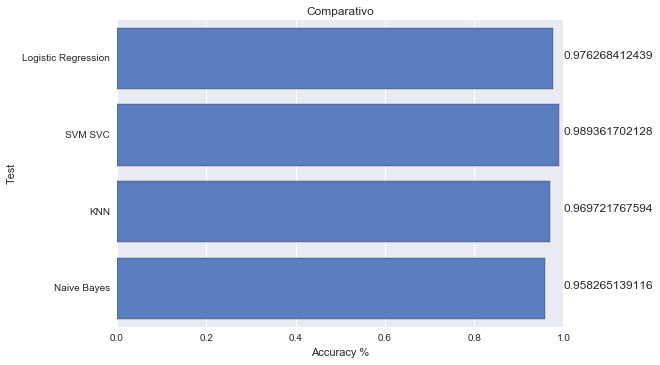

,Test,Accuracy
0,Logistic Regression,0.976268
0,SVM SVC,0.989362
0,KNN,0.969722
0,Naive Bayes,0.958265


In [5]:
tecnicas_selecionadas_aprovado = tecnicas_selecionadas_aprovado.append(returnScoreAprovado('Logistic Regression', logistic_regression))
tecnicas_selecionadas_aprovado = tecnicas_selecionadas_aprovado.append(returnScoreAprovado('SVM SVC', svm))
tecnicas_selecionadas_aprovado = tecnicas_selecionadas_aprovado.append(returnScoreAprovado('KNN', knn))
tecnicas_selecionadas_aprovado = tecnicas_selecionadas_aprovado.append(returnScoreAprovado('Naive Bayes', naive_bayes))

print('Comparativo das tecnicas aplicadas a Aprovado/Reprovado')
plotComparativo(tecnicas_selecionadas_aprovado)
tecnicas_selecionadas_aprovado

Comparativo das tecnicas aplicadas a Evasao


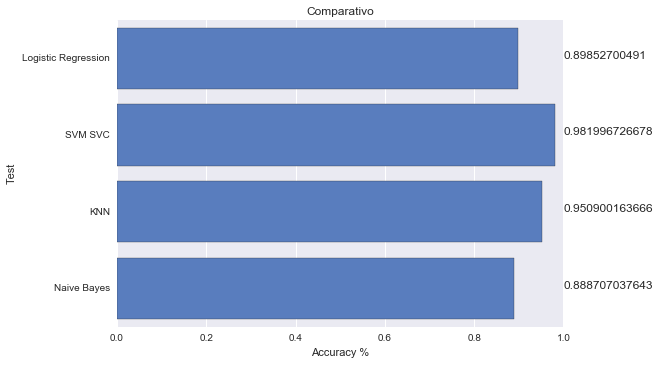

,Test,Accuracy
0,Logistic Regression,0.898527
0,SVM SVC,0.981997
0,KNN,0.950900
0,Naive Bayes,0.888707


In [6]:
tecnicas_selecionadas_evasao = tecnicas_selecionadas_evasao.append(returnScoreEvasao('Logistic Regression', logistic_regression))
tecnicas_selecionadas_evasao = tecnicas_selecionadas_evasao.append(returnScoreEvasao('SVM SVC', svm))
tecnicas_selecionadas_evasao = tecnicas_selecionadas_evasao.append(returnScoreEvasao('KNN', knn))
tecnicas_selecionadas_evasao = tecnicas_selecionadas_evasao.append(returnScoreEvasao('Naive Bayes', naive_bayes))

print('Comparativo das tecnicas aplicadas a Evasao')
plotComparativo(tecnicas_selecionadas_evasao)
tecnicas_selecionadas_evasao

In [7]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def matrizConfusao(model, validacao):
    # Matriz de confusão 
    
    # import some data to play with
    if validacao == 'aprovado':
        X = train_data_aprovado
        y = target_data_aprovado
    elif validacao == 'evasao':
        X = train_data_evasao
        y = target_data_evasao
    
    # Split the data into a training set and a test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    
    # Run classifier, using a model that is too regularized (C too low) to see
    # the impact on the results
    classifier = model
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    print('Confusion matrix, without normalization')
    print(cm)
    plt.figure()
    plot_confusion_matrix(cm)
    
    # Normalize the confusion matrix by row (i.e by the number of samples
    # in each class)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
    print(cm_normalized)
    plt.figure()
    plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
    
    plt.show()

def plotMatrizConfusao(validacao):
    print('\n\n*** Matriz de confusão para ' + validacao + ' *** \n\n')
    # Matriz de confusão
    print("Matriz de confusão para Logistic Regression")
    matrizConfusao(logistic_regression, validacao)
    
    print("Matriz de confusão para SVM SVC")
    matrizConfusao(svm, validacao)
    
    print("Matriz de confusão para KNN")
    matrizConfusao(knn, validacao)
    
    print("Matriz de confusão para Naive Bayes")
    matrizConfusao(naive_bayes, validacao)
    
def returnRocAuc(model, validacao):
    # import some data to play with
    if validacao == 'aprovado':
        X = train_data_aprovado
        y = target_data_aprovado
    elif validacao == 'evasao':
        X = train_data_evasao
        y = target_data_evasao
    
    # Split the data into a training set and a test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    
    # Run classifier, using a model that is too regularized (C too low) to see
    # the impact on the results
    classifier = model
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    return roc_auc, false_positive_rate, true_positive_rate


def plotRocCurve(validacao):
    
    roc_logistic_regression, fp_logistic_regression, tp_logistic_regression = returnRocAuc(logistic_regression, validacao)
    roc_svm, fp_svm, tp_svm = returnRocAuc(svm, validacao)
    roc_knn, fp_knn, tp_knn = returnRocAuc(knn, validacao)
    roc_naive_bayes, fp_naive_bayes, tp_naive_bayes = returnRocAuc(naive_bayes, validacao)
    
    # Plot of a ROC curve for a specific class
    plt.figure()
    plt.plot(fp_logistic_regression, tp_logistic_regression, 'b', marker='s', label='Logistic Regression AUC = %0.2f'% roc_logistic_regression)
    plt.plot(fp_svm, tp_svm, 'r', marker='s', label='SVM AUC = %0.2f'% roc_svm)
    plt.plot(fp_knn, tp_knn, 'y', marker='s', label='KNN AUC = %0.2f'% roc_knn)
    plt.plot(fp_naive_bayes, tp_naive_bayes, 'g', marker='s', label='Naive Bayes AUC = %0.2f'% roc_naive_bayes)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()



*** Matriz de confusão para aprovado *** 


Matriz de confusão para Logistic Regression
Confusion matrix, without normalization
[[ 49   5]
 [  0 252]]
Normalized confusion matrix
[[ 0.91  0.09]
 [ 0.    1.  ]]


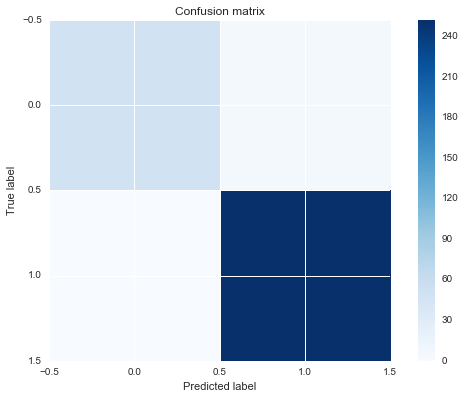

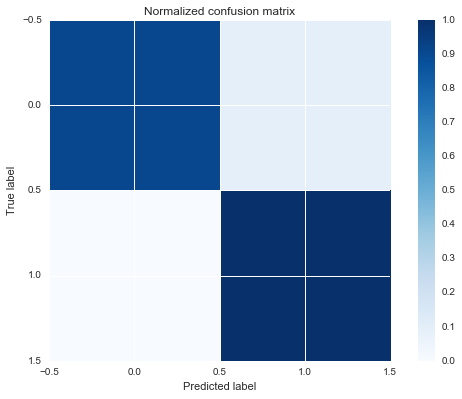

Matriz de confusão para SVM SVC
Confusion matrix, without normalization
[[ 27  27]
 [  0 252]]
Normalized confusion matrix
[[ 0.5  0.5]
 [ 0.   1. ]]


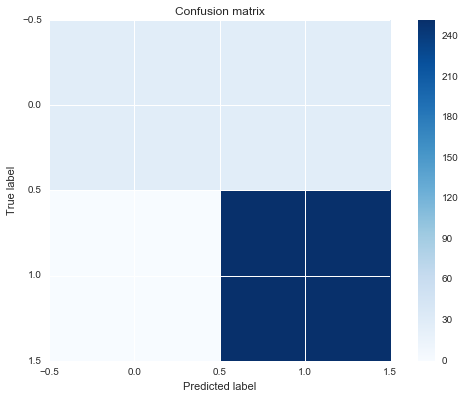

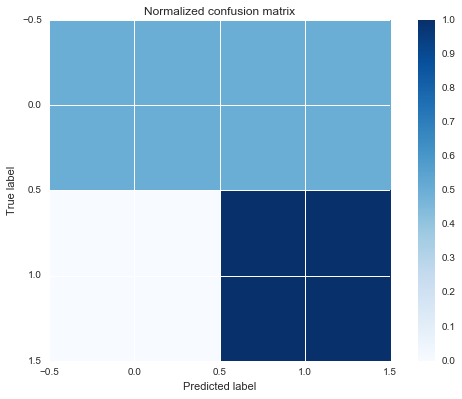

Matriz de confusão para KNN
Confusion matrix, without normalization
[[ 41  13]
 [  4 248]]
Normalized confusion matrix
[[ 0.76  0.24]
 [ 0.02  0.98]]


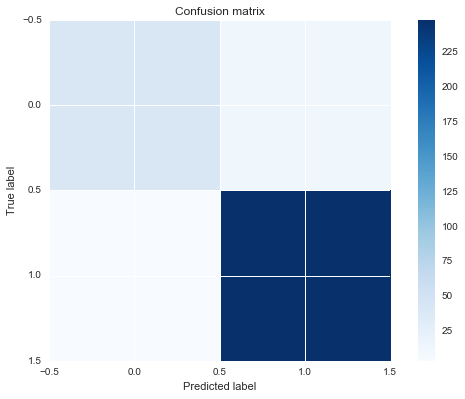

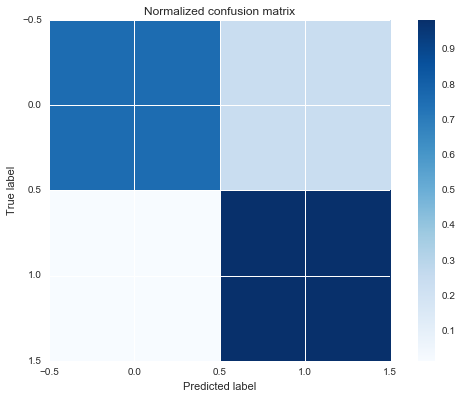

Matriz de confusão para Naive Bayes
Confusion matrix, without normalization
[[ 48   6]
 [  5 247]]
Normalized confusion matrix
[[ 0.89  0.11]
 [ 0.02  0.98]]


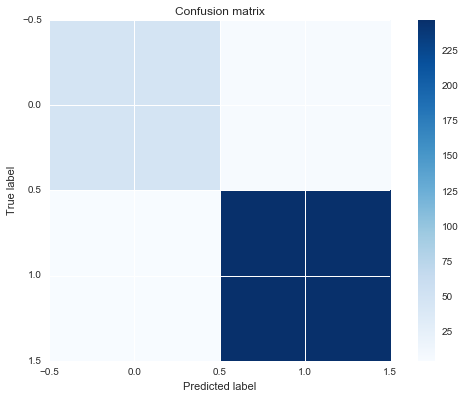

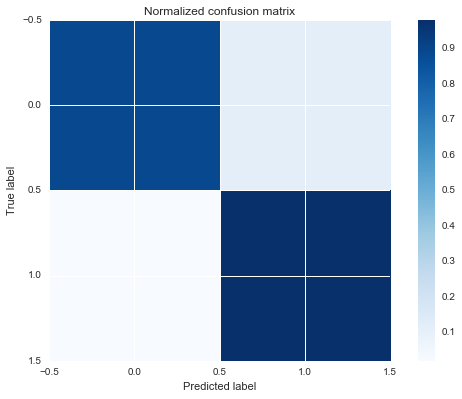

In [8]:
plotMatrizConfusao('aprovado')



*** Matriz de confusão para evasao *** 


Matriz de confusão para Logistic Regression
Confusion matrix, without normalization
[[257   8]
 [ 18  23]]
Normalized confusion matrix
[[ 0.97  0.03]
 [ 0.44  0.56]]


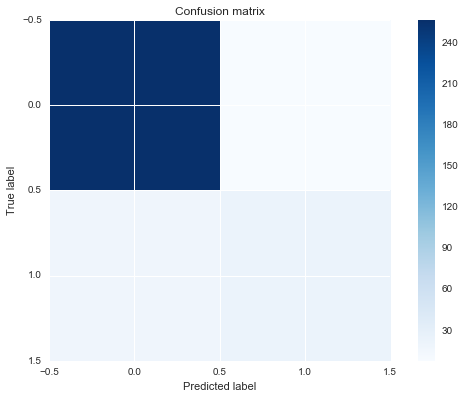

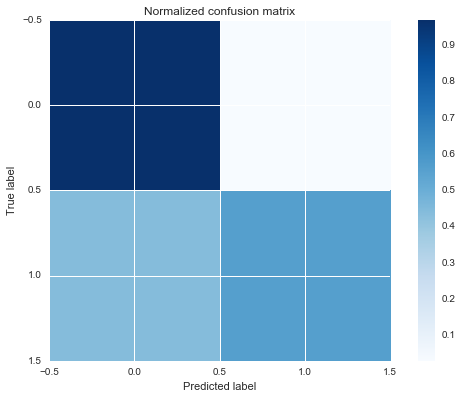

Matriz de confusão para SVM SVC
Confusion matrix, without normalization
[[261   4]
 [ 31  10]]
Normalized confusion matrix
[[ 0.98  0.02]
 [ 0.76  0.24]]


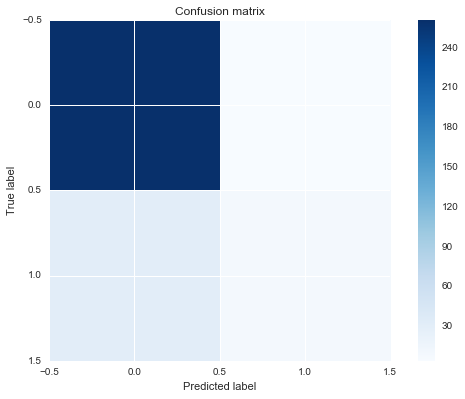

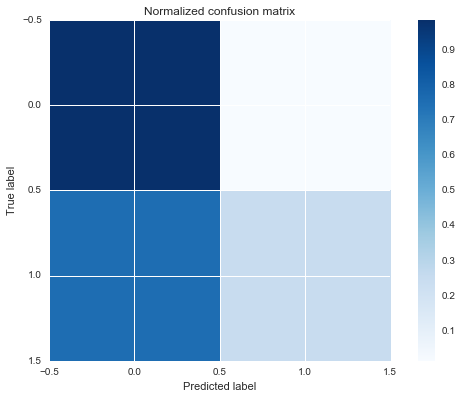

Matriz de confusão para KNN
Confusion matrix, without normalization
[[253  12]
 [ 23  18]]
Normalized confusion matrix
[[ 0.95  0.05]
 [ 0.56  0.44]]


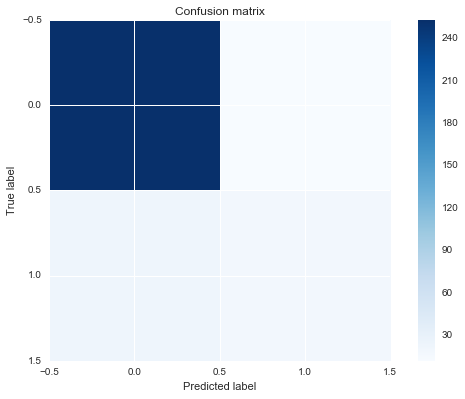

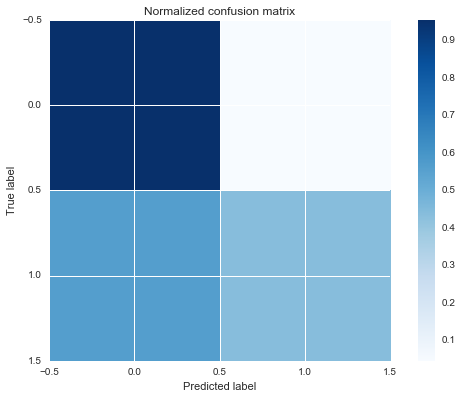

Matriz de confusão para Naive Bayes
Confusion matrix, without normalization
[[241  24]
 [ 13  28]]
Normalized confusion matrix
[[ 0.91  0.09]
 [ 0.32  0.68]]


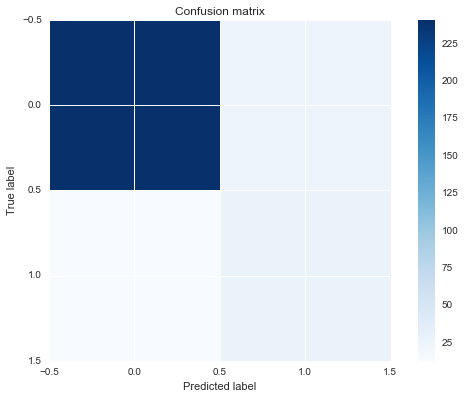

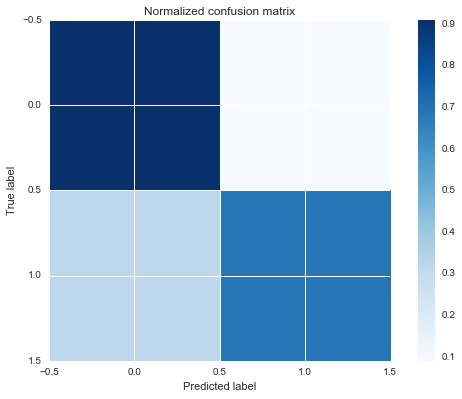

In [9]:
plotMatrizConfusao('evasao')

Curva ROC Aprovado/Reprovado


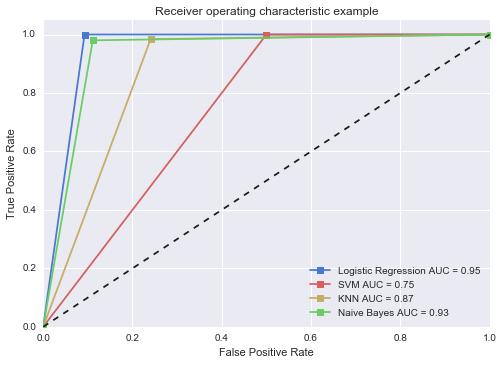

In [10]:
print('Curva ROC Aprovado/Reprovado')
plotRocCurve('aprovado')

Curva ROC Evasao


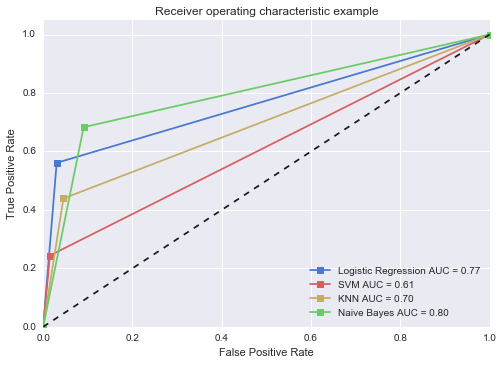

In [11]:
print('Curva ROC Evasao')
plotRocCurve('evasao')